<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipython-input-3379268200.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3379268200.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

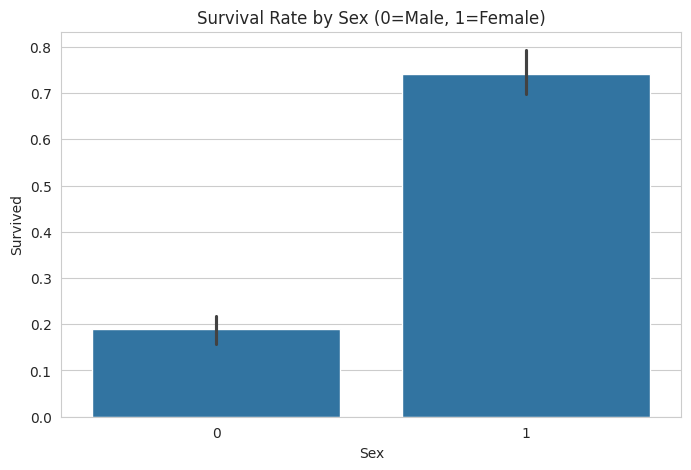

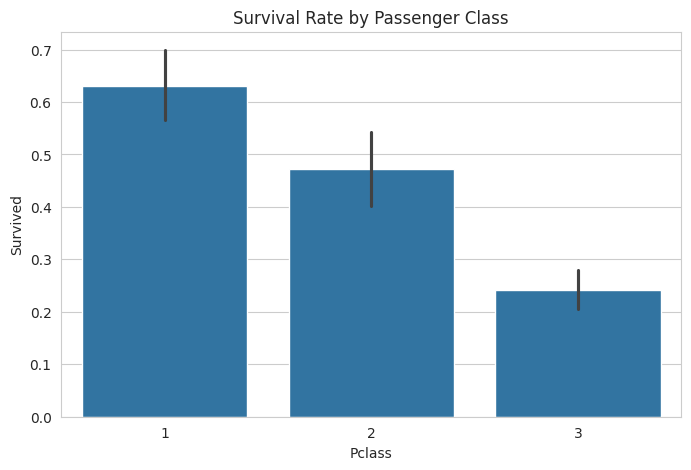

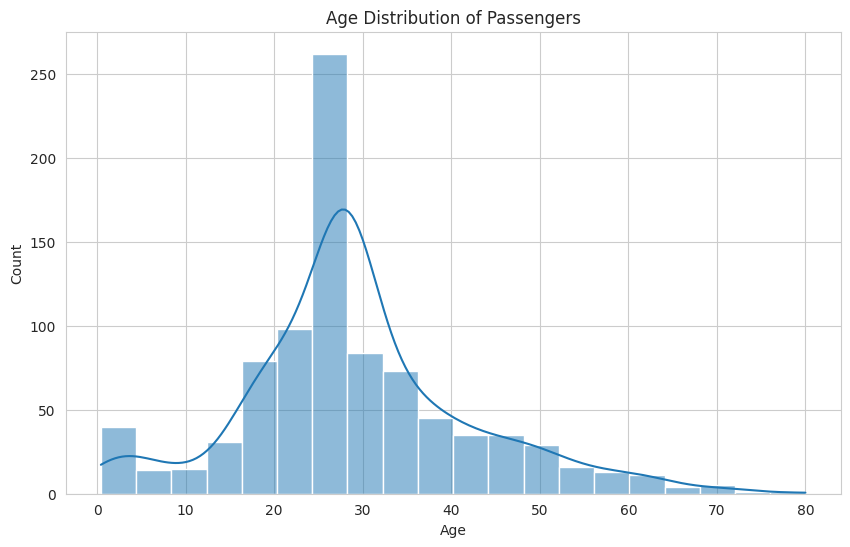

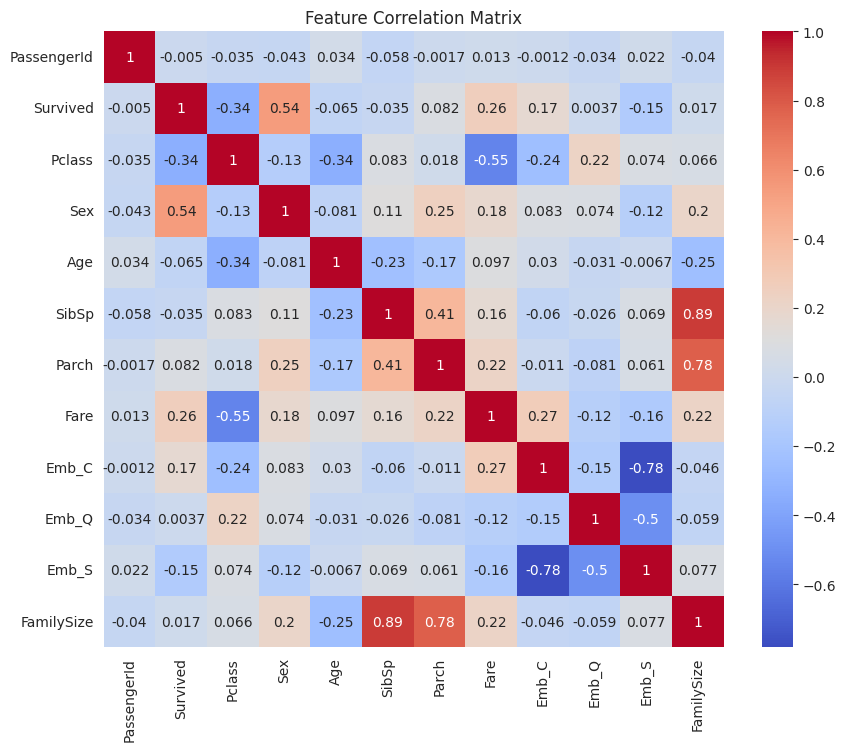

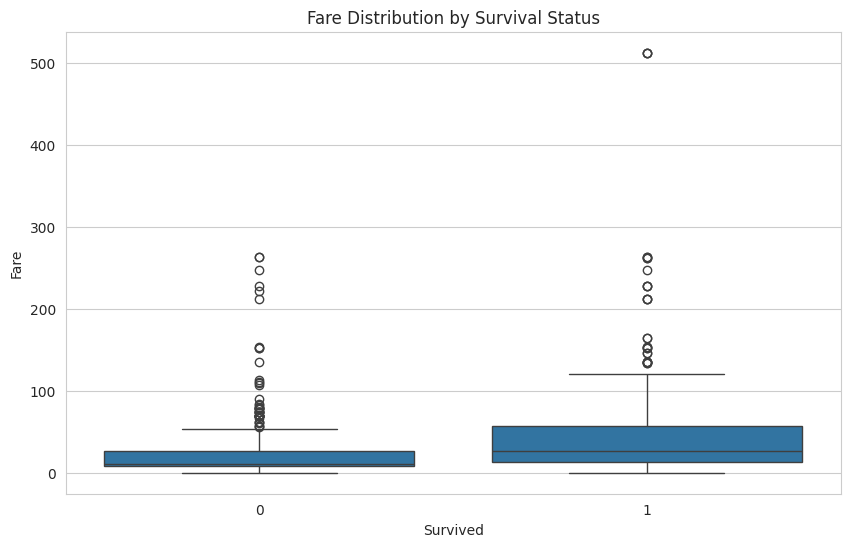

Training set: (712, 5)
Test set: (179, 5)
Cleaned dataset saved as 'titanic_cleaned.csv'


In [2]:
# %% [markdown]
# # Titanic Dataset Analysis
# ## Complete Pandas Workflow

# %% [markdown]
# ### 1. Setup & Data Loading

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(f"Data shape: {df.shape}")
df.head()

# %% [markdown]
# ### 2. Exploratory Data Analysis (EDA)

# %%
# Basic info
df.info()

# %%
# Summary stats
df.describe()

# %%
# Missing values
df.isna().sum()

# %% [markdown]
# ### 3. Data Cleaning

# %%
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Convert categorical data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], prefix='Emb')

# Verify
df.isna().sum()

# %% [markdown]
# ### 4. Feature Engineering

# %%
# Create new features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['AgeGroup'] = pd.cut(df['Age'],
                       bins=[0, 18, 35, 60, 100],
                       labels=['Child', 'Young', 'Adult', 'Senior'])

# Show new features
df[['Age', 'AgeGroup', 'FamilySize']].head()

# %% [markdown]
# ### 5. Data Visualization

# %%
# Survival by Sex
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex (0=Male, 1=Female)')
plt.show()

# %%
# Survival by Pclass
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# %%
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution of Passengers')
plt.show()

# %% [markdown]
# ### 6. Advanced Analysis

# %%
# Correlation matrix
plt.figure(figsize=(10,8))
# Drop non-numeric columns before calculating correlation
sns.heatmap(df.drop(['Name', 'Ticket', 'AgeGroup'], axis=1).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# %%
# Fare vs Survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.show()

# %% [markdown]
# ### 7. Machine Learning Prep

# %%
from sklearn.model_selection import train_test_split

# Select features
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# %% [markdown]
# ### 8. Export Data

# %%
# Save cleaned data
df.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned dataset saved as 'titanic_cleaned.csv'")